In [8]:
from os.path import abspath, join
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_bar, aes, scale_x_discrete, theme, element_text, labs, \
	geom_histogram, facet_wrap, element_blank, scale_x_continuous, scale_y_continuous, geom_line, \
	geom_boxplot

In [9]:
# SETUP DATA
path = "C:/Nitsan/third/JavaAnalyzer"
results_file = "analyzerResults_v2.csv"
df = pd.read_csv(abspath(join(path, results_file)))
all_frequencies = pd.read_csv(abspath(join(path, 'analyzerResults_words_ALL.csv')))
filtered_out_words = all_frequencies[np.where(all_frequencies['external'] == 1, True, False)][
	'word']
df["external"] = df['name'].isin(filtered_out_words)


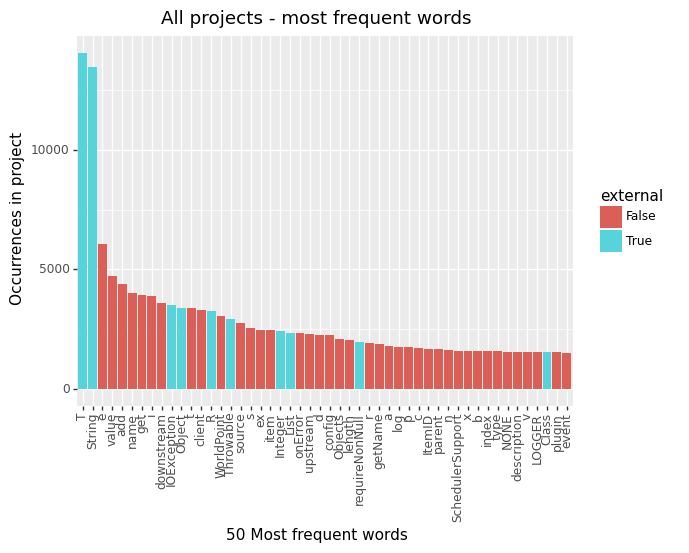

<ggplot: (144892647693)>


In [10]:
n=50
hist_name_external_all = df.groupby(["name", "external"]).size().reset_index(name="count")
hist_name_external_all = hist_name_external_all.nlargest(n, "count")

print(
	ggplot(hist_name_external_all)
	+ labs(x=str(n) + " Most frequent words",
		   y="Occurrences in project",
		   title="All projects - most frequent words")
	+ scale_x_discrete(limits=hist_name_external_all['name'].tolist())
	+ geom_bar(aes(x='name', y='count', fill="external"), stat='identity')
	+ theme(axis_text_x=element_text(rotation=90))
)

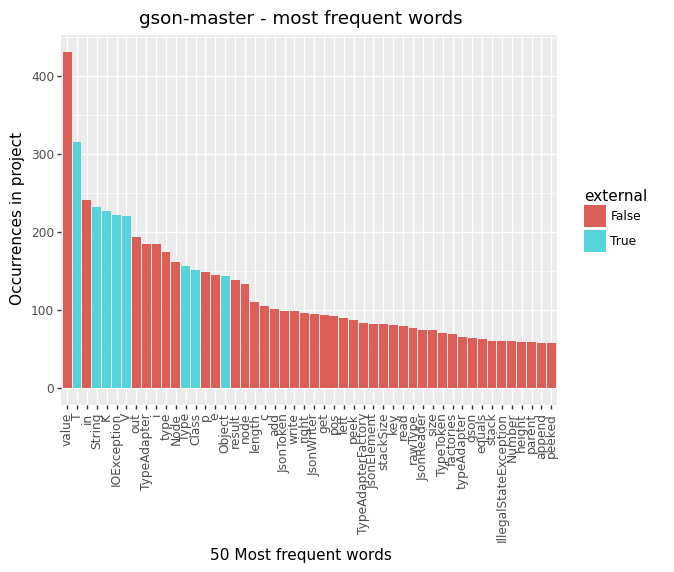

<ggplot: (144894046781)>
<ggplot: (144895058472)>
<ggplot: (144895164130)>
<ggplot: (144895163953)>
<ggplot: (144893465040)>
<ggplot: (144890583176)>


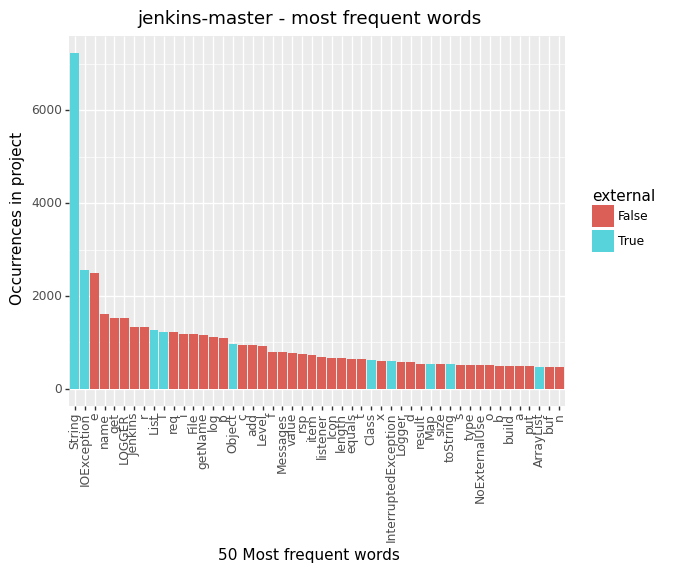

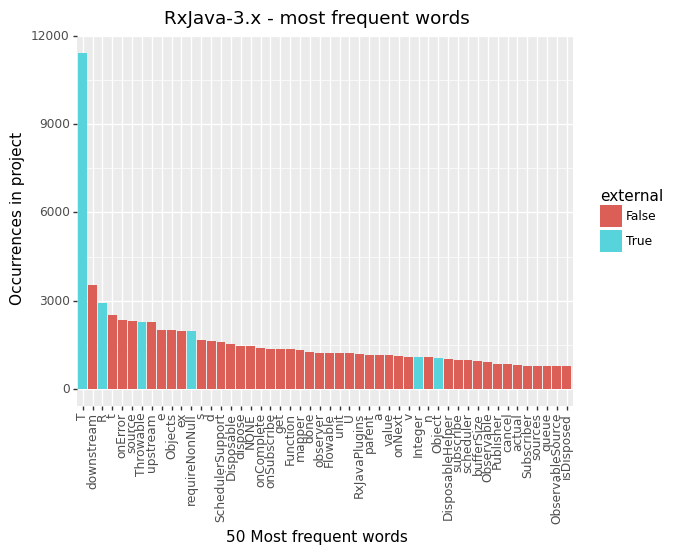

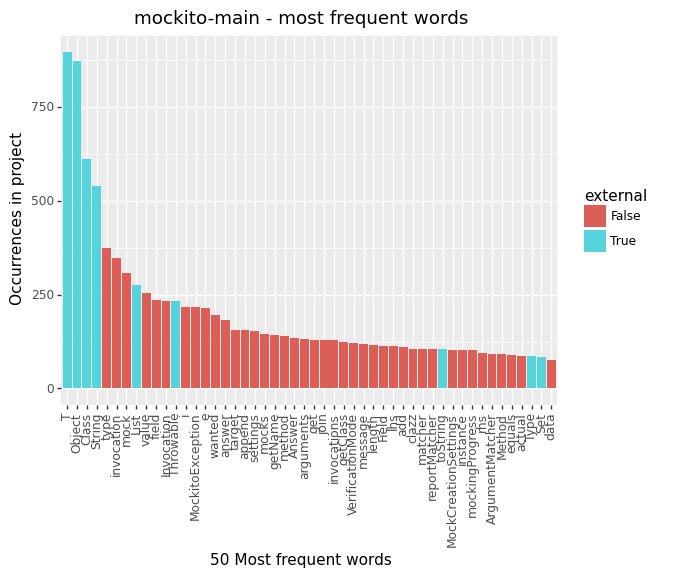

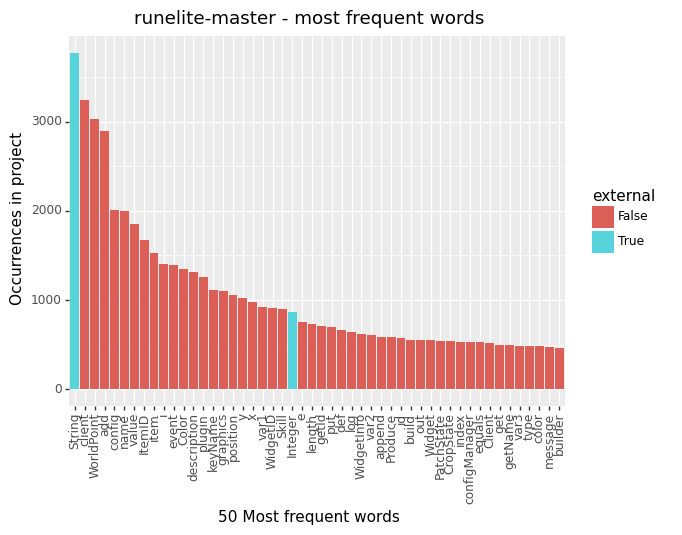

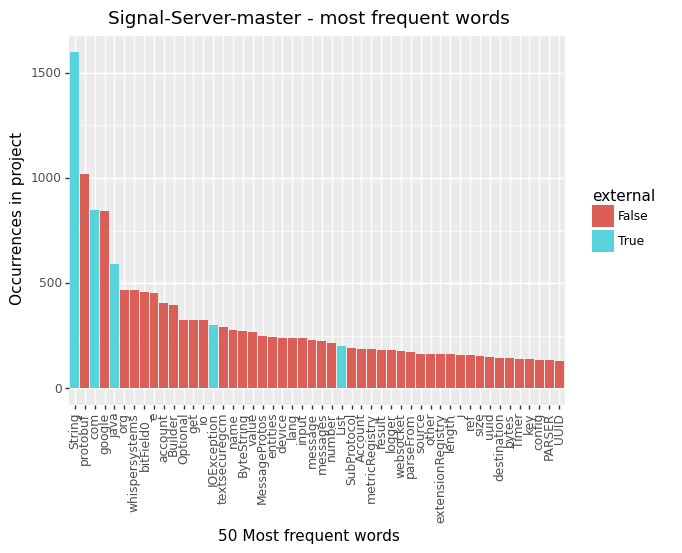

In [11]:
hist_name_project_external = df.groupby(["name", "project", "external"]).size().reset_index\
	(name="count")

for project_name in hist_name_project_external.project.unique():
	project = hist_name_project_external[hist_name_project_external["project"] == project_name]
	project = project.nlargest(n, "count")
	print(
		ggplot(project)
		+ labs(x=str(n) + " Most frequent words",
			   y="Occurrences in project",
			   title=project_name + " - most frequent words")
		+ scale_x_discrete(limits=project['name'].tolist())
		+ geom_bar(aes(x='name', y='count', fill="external"), stat='identity')
		+ theme(axis_text_x=element_text(rotation=90))
	)


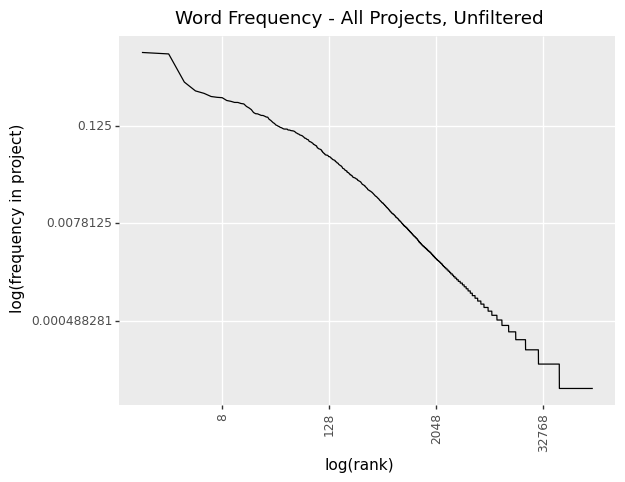

<ggplot: (144890295275)>
<ggplot: (144894264998)>


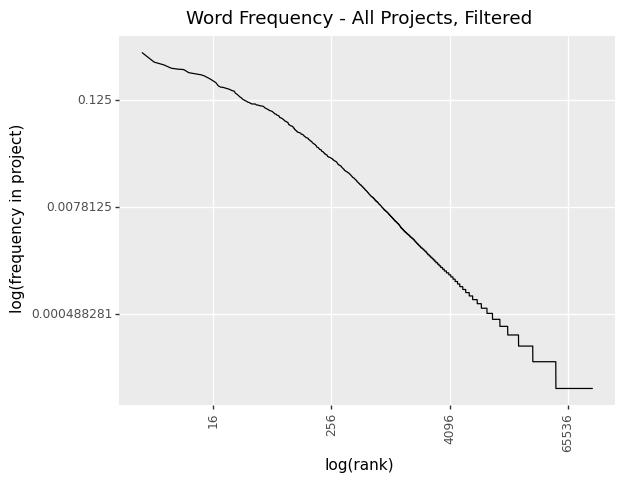

In [12]:
freq_name_external_all = df.groupby(["name", "external"]).size() \
	.reset_index(name="count") \
	.sort_values("count", ascending=False)
most_frequent_word_occurrences = int(freq_name_external_all[:1]['count'])

freq_name_external_all['frequency'] = freq_name_external_all['count'] / most_frequent_word_occurrences
data_length = freq_name_external_all.shape[0]
freq_name_external_all['rank'] = np.linspace(1, data_length, data_length)

print(ggplot(freq_name_external_all)
	  + labs(x="log(rank)",
			 y="log(frequency in project)",
			 title="Word Frequency - All Projects, Unfiltered")
	  + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2')
	  + geom_line(aes(x='rank', y='frequency'), stat='identity')
	  + theme(axis_text_x=element_text(rotation=90))
	  )

print(ggplot(freq_name_external_all[freq_name_external_all["external"] == False])
	  + labs(x="log(rank)",
			 y="log(frequency in project)",
			 title="Word Frequency - All Projects, Filtered")
	  + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2')
	  + geom_line(aes(x='rank', y='frequency'), stat='identity')
	  + theme(axis_text_x=element_text(rotation=90))
	  )



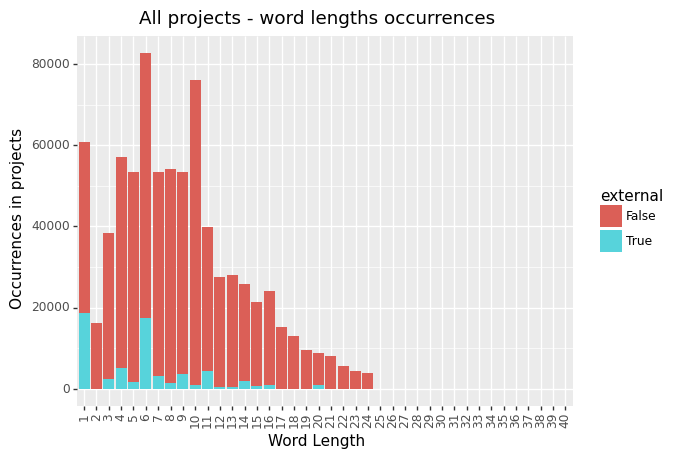

<ggplot: (144895522277)>


In [47]:
freq_length_external_all = df.groupby(["length", "external"])\
	.size() \
	.reset_index(name="count") \
	.sort_values("count", ascending=False)
most_frequent_length_occurrences = int(freq_length_external_all[:1]['count'])

freq_length_external_all['frequency'] = \
	freq_length_external_all['count'] / most_frequent_length_occurrences
data_length = freq_length_external_all.shape[0]
freq_length_external_all['rank'] = np.linspace(1, data_length, data_length)

bins = 10
freq_length_external_all["bin"] = pd.qcut(freq_length_external_all["length"],
										 q=8)

freq_length_external_all["log_bin"] = pd.cut(freq_length_external_all["length"],
											 bins=([0] + list(np.logspace(1, 7, 7, base=2))),
											 labels=["1-2", "3-4","4-7","8-15","16-31","32-63",
													 "64-128"])


n=40
hist_length_external_all = df.groupby(["length", "external"]).size().reset_index(name="count")
hist_length_external_all = hist_length_external_all.nsmallest(n, "length")

print(
	ggplot(hist_length_external_all)
	+ labs(x="Word Length",
		   y="Occurrences in projects",
		   title="All projects - word lengths occurrences")
	+ scale_x_discrete(limits=range(1, 41))
	+ geom_bar(aes(x='length', y='count', fill="external"), stat='identity')
	+ theme(axis_text_x=element_text(rotation=90))
)

In [ ]:
print(ggplot(freq_length_external_all[freq_length_external_all["external"] == False])
      + labs(x="log(rank)",
             y="log(frequency in project)",
             title="Word Length Frequency - All Projects, Filtered")
      + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2')
      + geom_line(aes(x='rank', y='frequency'), stat='identity')
      + theme(axis_text_x=element_text(rotation=90))
      )

print(ggplot(freq_length_external_all[freq_length_external_all["external"] == False])
      + labs(x="log(rank)",
             y="log(frequency in project)",
             title="Word Length Frequency - All Projects, Filtered")
      + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2')
      + geom_line(aes(x='rank', y='frequency'), stat='identity')
      + theme(axis_text_x=element_text(rotation=90))
      )


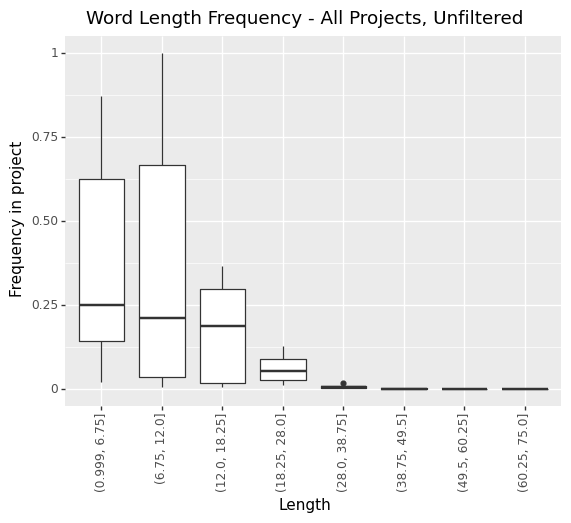

<ggplot: (144893787953)>
<ggplot: (144890124346)>
<ggplot: (144889798163)>


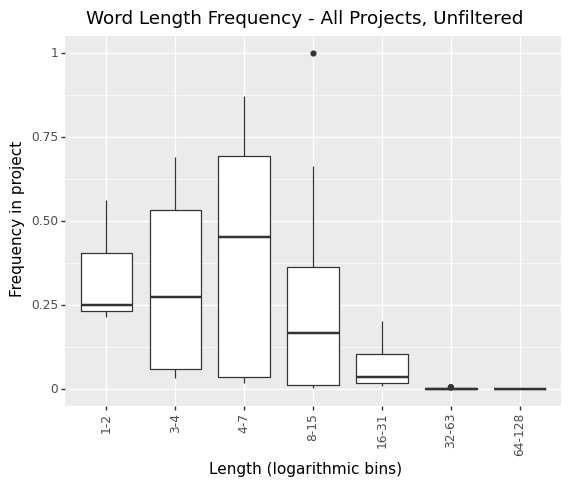

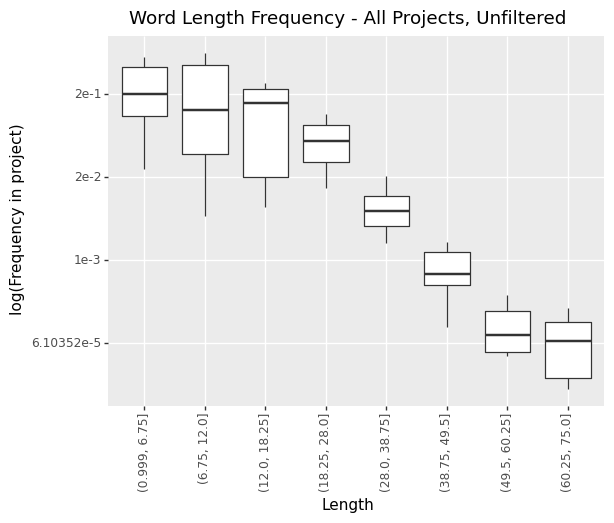

In [40]:
print(ggplot(freq_length_external_all)
			+ labs(x="Length",
				   y="Frequency in project",
				   title="Word Length Frequency - All Projects, Unfiltered")
	  + geom_boxplot(aes(x='bin', y='frequency'))
	  + theme(axis_text_x=element_text(rotation=90))
	  )

print(ggplot(freq_length_external_all)
	  + labs(x="Length (logarithmic bins)",
			 y="Frequency in project",
			 title="Word Length Frequency - All Projects, Unfiltered")
	  # + scale_y_continuous(trans='log2')
	  + geom_boxplot(aes(x='log_bin', y='frequency'))
	  + theme(axis_text_x=element_text(rotation=90))
	  )


print(ggplot(freq_length_external_all)
	  + labs(x="Length",
			 y="log(Frequency in project)",
			 title="Word Length Frequency - All Projects, Unfiltered")
	  + scale_y_continuous(trans='log2')
	  + geom_boxplot(aes(x='bin', y='frequency'))
	  + theme(axis_text_x=element_text(rotation=90))
	  )


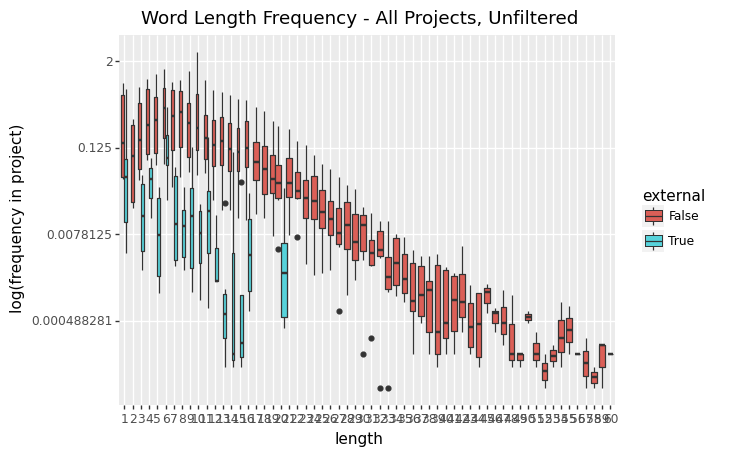

<ggplot: (144893490649)>


In [32]:
freq_length_project_external = df.groupby(["length", "external", "project"])\
	.size()\
	.reset_index(name="count")
freq_length_project_external = freq_length_project_external[freq_length_project_external["length"] <= 60]
most_frequent_length_occurrences = int(freq_length_project_external[:1]['count'])

freq_length_project_external['frequency'] = freq_length_project_external['count'] / most_frequent_length_occurrences
freq_length_project_external["length"] = freq_length_project_external["length"].astype("category")

print(ggplot(freq_length_project_external)
	  + labs(x="length",
			 y="log(Frequency in project)",
			 title="Word Length Frequency - All Projects, Unfiltered")
	  + scale_y_continuous(trans='log2')
	  + geom_boxplot(aes(x='length', y='frequency', fill="external"))
	  )